Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import pandas as pd
import sys
from tqdm import tqdm
import seaborn as sns

Función para leer dataframe

In [ ]:
def cargar_df():
    path_ = input('Ingresar ruta de acceso del archivo') 
    sep_ = input('Ingresar caracter de separación:')
    df_load = pd.read_csv(path_, sep=sep_)
    return df_load

# Análisis de datos

Función para calcular el número de atributos y los atributos contenidos en el dataframe

In [ ]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
    for i in range(num_atributos_):   
        print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

Función para obtener los atributos, sus observaciones y el tipo de atributo

In [ ]:
def Observaciones(df_o, atributos_o):
    observaciones_ = {}
    for i, atributo in enumerate(atributos_o):
        obs_ = df_o[atributo].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        obs_ = pd.DataFrame(obs_.index)      

        tipo = df_o[atributo].dtypes

        if tipo == 'object': tipo = 'categórico'
        elif tipo == 'int': tipo = 'discreto'
        elif tipo == 'float64': tipo = 'continuo'

        print(f'''El atributo {atributo} es de tipo {tipo}, contiene {len(obs_l_)} observaciones y son las siguientes:
        {obs_l_}
              ''')
        observaciones_.update({atributo:obs_})    
    return observaciones_

Función para calcular el número de instancias

In [ ]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
    print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

Función para conocer el número de datos faltantes

In [ ]:
def Datos_Faltantes(df_):
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo: {faltantes_df}')
    #return faltantes_df

Función que arroja el análisis de los datos, es decir, une las funciones definidad anteriormente

In [ ]:
def analisis_dataset(df_analisis):
    na = Numero_atributos(df_analisis)
    print('\n')
    ni = Numero_instancias(df_analisis)
    print('\n')
    faltantes = Datos_Faltantes(df_analisis)
   # return na, ni, faltantes

# Estadística

In [ ]:
def moda(atributo_):
    moda_1 = atributo_.value_counts()
    moda_ = list(moda_1.index)
    return moda_[0]

In [ ]:
def maximo(columna_):
  r = len(columna_)
  valor_maximo_ = columna_[0]
  for n in range(1, r):
    k = columna_[n]
    if valor_maximo_ < k:
      valor_maximo_ = k
  return valor_maximo_

In [ ]:
def minimo(columna_):
  r = len(columna_)
  valor_minimo_ = columna_[0]
  for n in range(1, r):
    k = columna_[n]
    if valor_minimo_ > k:
      valor_minimo_ = k
  return valor_minimo_

In [ ]:
def media(columna_):
  r = len(columna_)
  sumatoria = 0
  for i in range(r):
    sumatoria += columna_[i]
  media_ = sumatoria / r
  return media_

In [ ]:
def desviacion_estandar(columna_): #s
  r = len(columna_)
  media_columna = media(columna_)
  sumatoria = 0
  for i in range(r):
    s = columna_[i] - media_columna
    s = s**2
    sumatoria += s
  s = sumatoria / (r - 1)
  s = s ** (1/2)
  return s

In [ ]:
def varianza(columna_): #s2
  r = len(columna_)
  media_columna = media(columna_)
  sumatoria = 0
  for i in range(r):
    s = columna_[i] - media_columna
    s = s**2
    sumatoria += s
  s_2 = sumatoria / (r - 1)
  return s_2

In [ ]:
def estadistica(atributo_):
  mod = moda(atributo_)
  max = maximo(atributo_)
  min = minimo(atributo_)
  med = media(atributo_)
  std = desviacion_estandar(atributo_)
  var = varianza(atributo_)
  return mod, max, min, med, std, var

# Relación entre atributos

In [ ]:
def cuartiles(df_, atributo_):
#1. 25% de los datos es menor que o igual a este valor.
#2. La mediana. 50% de los datos es menor que o igual a este valor.
#3. 75% de los datos es menor que o igual a este valor.
#rango intercuartil. La distancia entre el primer 1er cuartil y el 3er 
#cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#ordenar los elementos de la columna
  v = df_[atributo_]
  v = np.asarray(v.sort_values())
  n = len(v)
  if n % 2 == 0:
 
    #calcular cuartil uno 
    a = int(n/4) 
    q1 = v[a]
    #calcular cuartil dos
    b = (n)/2
    c = b - 1
    q2 = (v[b] + v[c])/2
    #calcular cuartil tres
    d = int((3*n)/4)
    q3 = v[d]
  else:

    #calcular cuartil dos
    b = int(n/2)
    q2 = v[b]
    
    if b % 2 == 0:
      #calcular cuartil uno 
      a = int(n/4) 
      q1 = (v[a] + v[a-1])/2
      #calcular cuartil tres 
      d = int((3*(n))/4) 
      q3 = (v[a] + v[d-1])/2
    else:

      #calcular cuartil uno 
      a = int(n/4) 
      q1 = v[a]
      #calcular cuartil tres
      d = int((3*n)/4)
      q3 = v[d]

  print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')
  return q1, q2, q3

In [ ]:
def outlier(df_,atributo_):
  v = df_[atributo_]
  q1, q2, q3 = cuartiles(df_,atributo_)
  out = []
  for valor in v:
    if valor < q1:
      if abs(valor-q1) > 1.5*(q3-q1):
        out.append(valor)
    if valor > q3:
      if abs(valor-q3) > 1.5*(q3-q1):
        out.append(valor)
    
  if len(out) == 0:
    print(f'No existen valores atípicos en el atributo {atributo_}')
  else:
    print(f'Se encontraron {len(out)} valores atípicos')
    print(f'Los valores atípicos encontrados son: {np.asarray(out)}')
  return out

In [ ]:
def box_plot(df_, atributo_):
  fig, ax = plt.subplots(figsize = (15,13))
  plt.boxplot(df[atributo_])
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  plt.show()

In [ ]:
def relacion_atributo(df_,atributo_):
  cuartiles(df_,atributo_)
  outlier(df_,atributo_)
  box_plot(df_,atributo_)
  

In [ ]:
def box_plot_sns(df_, atributo_):
  fig, ax = plt.subplots(figsize = (13,8))
  ax = sns.boxplot(x=df['BMI'], data=df)
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  plt.show()

In [ ]:
def covarianza(columna_, fila_):
  suma = 0
  for xi, yi in tqdm(zip(columna_, fila_)):
    suma +=((xi - np.mean(columna_)) * (yi - np.mean(fila_)))
    covar = suma * 1/(len(columna_)-1)
  return covar

In [ ]:
def Distribucion(df_, atributo_, atributo_d):
  fig, ax = plt.subplots(figsize = (13,10))
  sns.histplot(data = df_, x = atributo_, hue = atributo_d, ax = ax, kde=True, element = 'step')
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  ax.set_xlabel(atributo_)
  ax.set_ylabel("Frequencia")
  plt.show()

In [ ]:
def Balance_clases(df):

  atributo_d = input('¿Cuál es tu atributo de decisión?:')
  clases = df[atributo_d]
  cl = clases.value_counts() 
  cl_ = list(cl.index)

  porcentajes_ = (cl*100)/sum(cl)
  print(porcentajes_)

  print(f'El dataset cuenta con {len(cl_)} clases y son las siguientes: {cl_}')

#CARGAR DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sys.path.append('/content/drive/MyDrive/Machine_Learning')

In [ ]:
#/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
#/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
df = cargar_df()

Ingresar ruta de acceso del archivo/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
Ingresar caracter de separación:,


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.describe() #Comparación con funciones creadas

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


#Adquisición de información

In [ ]:
num_atributos, atributos = Numero_atributos(df)

El dataset tiene 18 atributos:
1.- HeartDisease 
2.- BMI 
3.- Smoking 
4.- AlcoholDrinking 
5.- Stroke 
6.- PhysicalHealth 
7.- MentalHealth 
8.- DiffWalking 
9.- Sex 
10.- AgeCategory 
11.- Race 
12.- Diabetic 
13.- PhysicalActivity 
14.- GenHealth 
15.- SleepTime 
16.- Asthma 
17.- KidneyDisease 
18.- SkinCancer 


In [ ]:
num_instancias = Numero_instancias(df)

El dataset tiene 319795 instancias


In [ ]:
observaciones = Observaciones(df, atributos)

El atributo HeartDisease es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['No', 'Yes']
              
El atributo BMI es de tipo continuo, contiene 3604 observaciones y son las siguientes:
        [26.63, 27.46, 27.44, 24.41, 27.12, 25.1, 28.7, 29.53, 32.28, 29.29, 25.84, 25.09, 25.75, 28.34, 24.21, 24.96, 29.05, 26.61, 28.19, 25.06, 25.82, 26.58, 28.89, 25.83, 24.39, 24.03, 27.37, 30.41, 24.33, 31.32, 28.25, 26.57, 23.49, 27.26, 24.8, 22.31, 27.89, 25.85, 23.3, 29.95, 23.63, 24.37, 26.45, 22.6, 30.9, 29.84, 22.96, 25.77, 25.61, 29.18, 22.81, 28.29, 21.63, 28.06, 23.78, 34.33, 29.76, 33.28, 30.13, 26.54, 29.26, 22.46, 25.11, 26.5, 28.32, 23.17, 23.75, 23.03, 31.57, 30.11, 27.41, 20.98, 28.48, 21.95, 27.98, 30.67, 21.93, 24.89, 31.89, 33.47, 23.4, 31.19, 21.79, 20.6, 22.15, 23.73, 24.69, 27.32, 26.39, 33.91, 23.67, 24.13, 21.46, 30.68, 35.43, 25.69, 28.13, 32.92, 23.91, 25.8, 32.61, 23.06, 31.01, 25.02, 32.55, 23.71, 31.62, 21.26, 24.28, 31.09, 32.49, 25.79

In [ ]:
Datos_Faltantes(df)

Datos faltantes por atributo: HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
analisis_dataset(df)

El dataset tiene 18 atributos:
1.- HeartDisease 
2.- BMI 
3.- Smoking 
4.- AlcoholDrinking 
5.- Stroke 
6.- PhysicalHealth 
7.- MentalHealth 
8.- DiffWalking 
9.- Sex 
10.- AgeCategory 
11.- Race 
12.- Diabetic 
13.- PhysicalActivity 
14.- GenHealth 
15.- SleepTime 
16.- Asthma 
17.- KidneyDisease 
18.- SkinCancer 


El dataset tiene 319795 instancias


Datos faltantes por atributo: HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
moda_, max_, min_, media_, std, var_ = estadistica(df['BMI'])

In [ ]:
maximo(df['SleepTime'])

24.0

In [ ]:
media(df['SleepTime'])

7.097074688472302

In [ ]:
desviacion_estandar(df['SleepTime'])

1.4360070609668765

In [ ]:
minimo(df['SleepTime'])

1.0

In [ ]:
varianza(df['SleepTime'])

2.0621162791467267

In [ ]:
covarianza(df['SleepTime'],df['BMI'])

319795it [04:31, 1177.46it/s]


-0.47300268824201436

In [ ]:
cuartiles(df,'SleepTime')

Q1: 6.0, Q2: 7.0, Q3: 8.0


(6.0, 7.0, 8.0)

In [ ]:
Balance_clases(df)

¿Cuál es tu atributo de decisión?:HeartDisease
No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64
El dataset cuenta con 2 clases y son las siguientes: ['No', 'Yes']


Q1: 24.03, Q2: 27.34, Q3: 31.42
Q1: 24.03, Q2: 27.34, Q3: 31.42
Se encontraron 10396 valores atípicos
Los valores atípicos encontrados son: [45.35 46.52 44.29 ... 53.16 42.57 46.56]


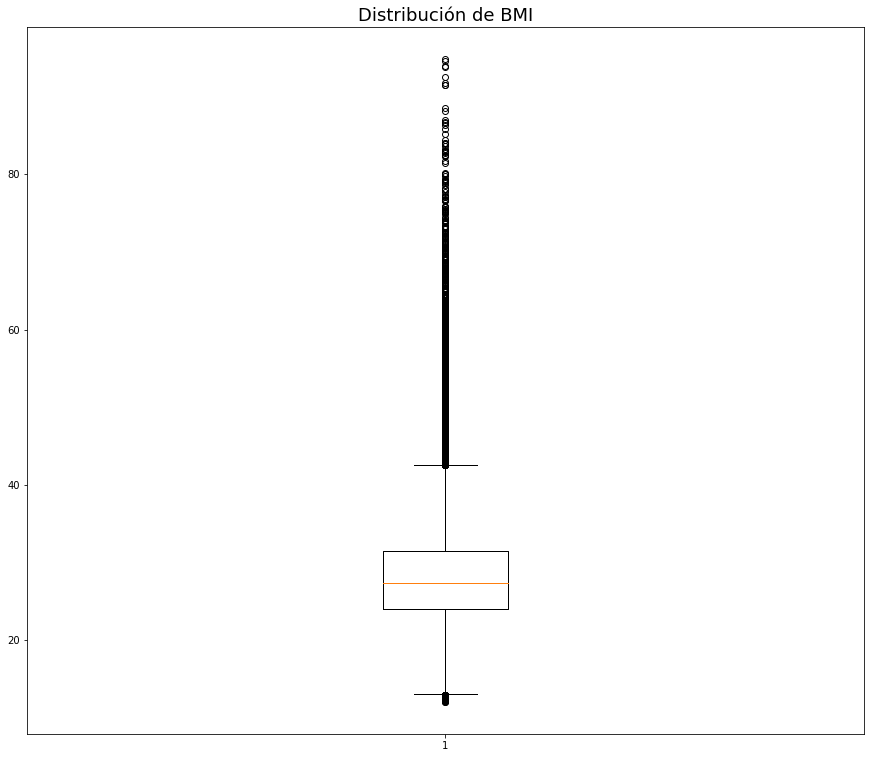

In [ ]:
relacion_atributo(df,'BMI')

In [ ]:
#outlier(df,'BMI')
#outlier(df,'PhysicalHealth')

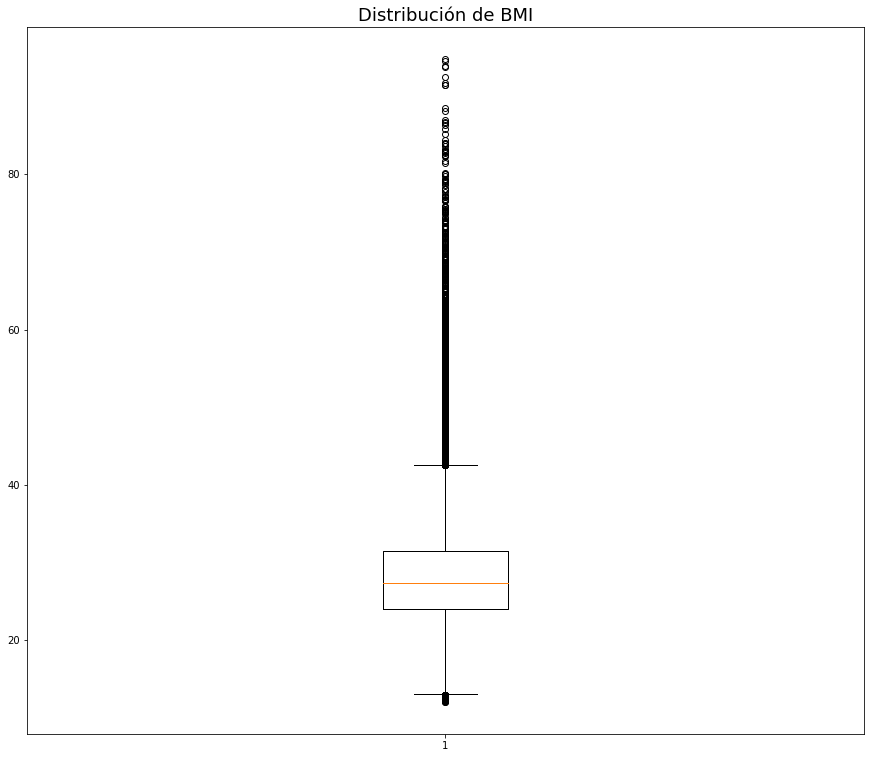

In [ ]:
box_plot(df_c,'BMI')

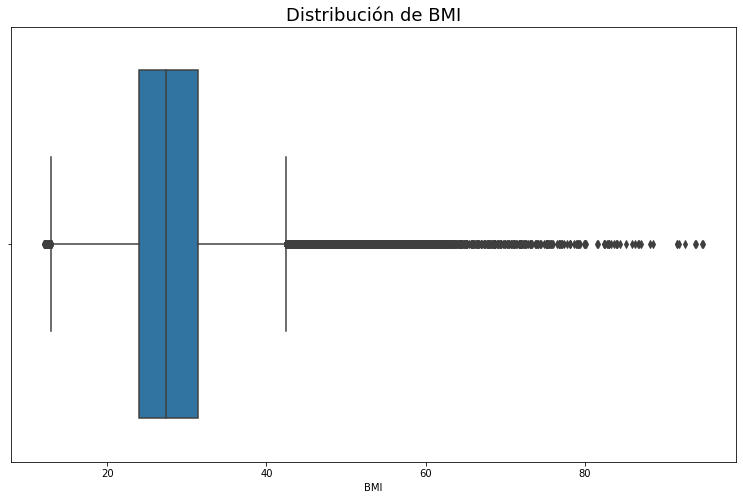

In [ ]:
box_plot_sns(df,'BMI')

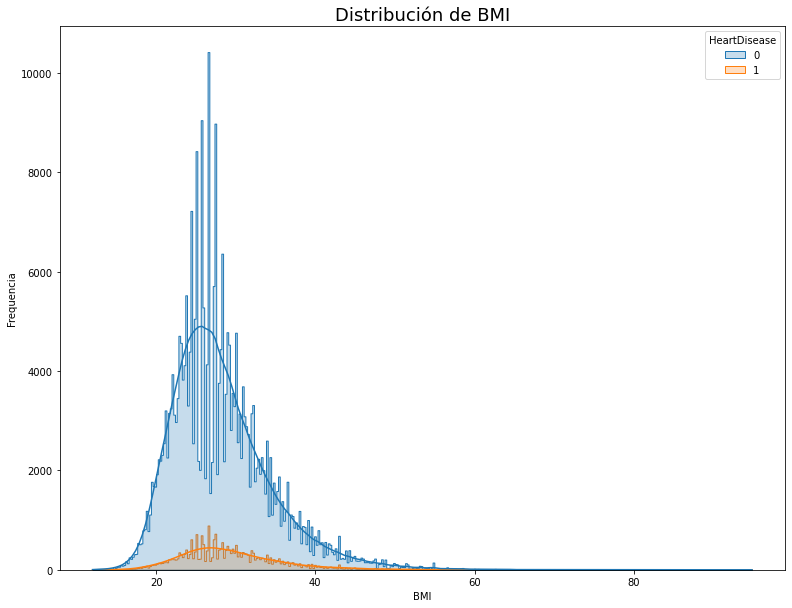

In [ ]:
Distribucion(df_c,'BMI','HeartDisease')

#Codificación categórico-numérico

In [ ]:
#from tqdm import tqdm
#def conversion(df,atri,obser):
 # df_codificado = df.copy()
  #for m in atri:
   # print(m)
    #if df[m].dtypes == 'O':
     # obser_analizar = np.asarray(obser[m])
      #for e, n in enumerate(obser_analizar):
       # for k in tqdm(range(len(df[m]))):
        #  if n == df[m][k]:
         #   df_codificado[m][k] = e

  #return df_codificado

In [ ]:
#df_cod = conversion(df, atr, obs)

In [ ]:
#df_cod

#Guardar dataset codificado

In [ ]:
#df_cod.to_csv('codificado_noindex.csv', header=False,index=False)

In [ ]:
#df_cod.to_excel('codificado_1.xlsx', header=True,index=True)

In [ ]:
#df_cod

In [ ]:
#/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
df_c = cargar_df()

Ingresar ruta de acceso del archivo/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
Ingresar caracter de separación:,


In [ ]:
#Después de la codificación el dataset quedo d ela siguiente manera:
#Hombre = 1,Mujer = 0;
#Smoking, Stroke DiffWalking, Diabetic, Ashtma, KidneyDisease, SkinCancer: (yes) = 1, (No) = 0;
#PhysicalActivity (yes) = 0, (No) = 1

df_c.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,3,0,1,0,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,5,0,0,0,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0,0,1,0,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,7,0,0,1,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,9,0,0,0,0,8.0,0,0,0
